# Which one is a better plan?

**Introduction

In the following project it is asked to make statictical calculation for telecom company.

The data is taken from different datasets and evaluates the usage of mobile internet, calls and its duration, sms messages.

The main goal is to check and correct the data, merge it in one dataframe and present the overall view on different plans and their proficiency.

Statistical part is consist of making statistical tests, testing hypotheses and checking the statistical variance in our calculations.

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
import seaborn as sns
from functools import reduce
from scipy import stats as st
import datetime
import math

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv') 
internet= pd.read_csv('/datasets/megaline_internet.csv') 
messages= pd.read_csv('/datasets/megaline_messages.csv')
plans= pd.read_csv('/datasets/megaline_plans.csv') 
users= pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

In [3]:
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv') 
    internet= pd.read_csv('/datasets/megaline_internet.csv') 
    messages= pd.read_csv('/datasets/megaline_messages.csv')
    plans= pd.read_csv('/datasets/megaline_plans.csv') 
    users= pd.read_csv('/datasets/megaline_users.csv')
except:
    print('Wrong path / file')
print('Statistical analyses project')
print()
calls.info()
print()
internet.info()
print()
messages.info()
print()
plans.info()
print()
users.info()
    


Statistical analyses project

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   C

In [4]:
calls.describe(include='object')

,id,call_date
count,137735,137735
unique,137735,351
top,1119_295,2018-12-27
freq,1,1091


In [5]:
print(internet)
internet.describe()

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [6]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [7]:
users
users.describe(include='object')

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Seymour,Hoffman,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,surf,2018-12-18
freq,3,3,80,5,339,3


Conclusion 1

The first look at given dataframes let us to make a few conclusions.

There is no missing values in given dataframes, except chunk_date column. The cause of it is that user had been used his tariff till the moment of data collection. It will be proceed in further steps.

ID column is the main column that connect customer's calls, messages, internet and plan that fits him.

There are few columns that should be transformed in case to make appropriate calculations (to change date to datetime format and change objects to integers)

**Step 2 Prepare the data


Convert the data to the appropriate type

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = [math.ceil(number) for number in calls['duration']]
calls['duration'] = calls['duration'].astype('int')
calls['duration']
calls['call_date']
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [9]:
#mb used as not rounded so it remains float64
# A new list will be created to see how many each user consume traffic per month
#And this value will be rounded

mb_to_gb = 0.001
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_date']

internet['month'] = internet['session_date'].dt.month

surf_ids_mb = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
surf_ids_mb['gb_used'] = surf_ids_mb['mb_used'] * mb_to_gb
surf_ids_mb['gb_used'] = [math.ceil(number) for number in surf_ids_mb['gb_used']]
surf_ids_mb['gb_used'] = surf_ids_mb['gb_used'].astype('int')
surf_ids_mb



mb_used  gb_used
user_id month                   
1000    12      1901.47        2
1001    8       6919.15        7
        9      13314.82       14
        10     22330.49       23
        11     18504.30       19
...                 ...      ...
1498    12     23137.69       24
1499    9      12984.76       13
        10     19492.43       20
        11     16813.83       17
        12     22059.21       23

[2277 rows x 2 columns]

In [10]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

In [11]:
def plan_id(plan_name):
    if plan_name == 'surf':
        return 0
    elif plan_name == 'ultimate':
        return 1 
plans['plan_id'] = plans['plan_name'].apply(plan_id)

In [12]:

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['reg_date']
users['plan_name_id'] = users['plan'].apply(plan_id)
users['churn_date'] = users['churn_date'].fillna(value = '20/02/2022')
users['churn_date'] = pd.to_datetime(users['churn_date'])
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2022-02-20,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2022-02-20,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2022-02-20,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2022-02-20,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2022-02-20,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2022-02-20,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2022-02-20,1
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2022-02-20,0


In this part all types of data were fixed: all the columns contained date were transformed to appropriate datetime using datetime function.

Calls duration were rounded using math (imported library) and type was changed to integer.

Pivot_table (based on user_id, session_month, mb_used and values with sum()function) was used for internet dataframe to calculate traffic per month and round it up to gygabites. 

For plans plan_id column were added by applying a function to identify current plan.

In churn_date missing values were filled by 01.01.19 (the date of the next year can be used to confirm using the current tariff plan).

**Checking for probable outliers and errors 

In [13]:
users.duplicated().sum()
users.query('age < 18')
print(users['city'].unique())
print(internet.query('mb_used == 0'))
calls.query('duration == 0')

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0
25,1001_13,1001,2018-12-24,0
31,1001_30,1001,2018-10-17,0
32,1001_31,1001,2018-11-03,0
34,1001_35,1001,2018-12-21,0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0
137715,1499_184,1499,2018-09-15,0
137720,1499_189,1499,2018-12-27,0
137722,1499_191,1499,2018-12-24,0


Due to the initiated test there is no big problems in the data (neither duplicates or outliers).

The presence of calls and "0"mb traffic can be explained by missed calls or failed internet connection. It is better to not delete or transform such data in any way because it can be used for mean calculations or another research( for example to count the number of 0 minutes calls per city and identify the reason of it).

**The number of calls made amd minutes per month

In [14]:
calls['month'] = calls['call_date'].dt.month
calls_ids_length = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc = 'sum')
calls_ids_length

duration
user_id month          
1000    12          124
1001    8           182
        9           315
        10          393
        11          426
...                 ...
1498    12          339
1499    9           346
        10          385
        11          308
        12          496

[2258 rows x 1 columns]

In [15]:
monthly_calls = calls.groupby(['user_id', 'month']).month.count()
monthly_calls

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: month, Length: 2258, dtype: int64

**The number of text messages sent per month

In [16]:
messages['month'] = messages['message_date'].dt.month
monthly_messages = messages.groupby(['user_id', 'month']).message_date.count()
monthly_messages.head()

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
Name: message_date, dtype: int64

**The volume of data per month

In [17]:
surf_ids_mb.tail()

mb_used  gb_used
user_id month                   
1498    12     23137.69       24
1499    9      12984.76       13
        10     19492.43       20
        11     16813.83       17
        12     22059.21       23

**Conclusion

Calculations to count internet, calls and messages were made by using pivot tables and groupby() function with month column that was aggregated for it. 

**Monthly profit for each user

In [18]:
data_frames = [calls_ids_length, monthly_messages, surf_ids_mb]
user_usages = reduce(lambda left, right: pd.merge(left,right,on=['user_id', 'month'],
                                                 how='outer'),data_frames)

user_usages.rename(columns = {'message_date':'messages'}, inplace=True)
data_frames_1 = [user_usages, users]
user_usages = reduce(lambda left, right: pd.merge(left,right,on=['user_id'],
                                                 how='outer'),data_frames_1)
user_usages = user_usages.fillna(value=0)

# 0 value means the user did not use this certain service this month


user_usages

,user_id,duration,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id
0,1000,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2022-02-20,1
1,1001,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0
2,1001,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0
3,1001,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0
4,1001,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2022-02-20,0
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2022-02-20,0
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2022-02-20,0
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2022-02-20,1


In [19]:
def cost(row):
    '''
    This function is made to understand how much each customer pays for every month
    '''
    duration=row['duration']
    messages=row['messages']
    gb_used=row['gb_used']
    mb_used=row['mb_used']
    plan=row['plan']
    plan_cost = 0
    calls_cost = 0
    messages_cost = 0
    surf_cost = 0
    total_cost = 0
    gb_included_ulti = 30
    gb_included_surf = 15
    
    if plan == 'ultimate':
        plan_cost = plans['usd_monthly_pay'].max()
        if duration > plans['minutes_included'].max():
            calls_cost = (duration-plans['minutes_included'].max())*plans['usd_per_minute'].min()
        if messages > plans['messages_included'].max():
            messages_cost = (messages-plans['messages_included'].max())*plans['usd_per_message'].min()
        if mb_used > plans['mb_per_month_included'].max():
            surf_cost = (gb_used - gb_included_ulti)*plans['usd_per_gb'].min()
            
            
    elif plan == 'surf':
        plan_cost = plans['usd_monthly_pay'].min()
        if duration > plans['minutes_included'].min():
            calls_cost = (duration-plans['minutes_included'].min())*plans['usd_per_minute'].max()
        if messages > plans['messages_included'].min():
            messages_cost = (messages-plans['messages_included'].min())*plans['usd_per_message'].max()
        if mb_used > plans['mb_per_month_included'].min():
            surf_cost = (gb_used - gb_included_surf)*plans['usd_per_gb'].max()
    
    total_cost = plan_cost + calls_cost + messages_cost + surf_cost
    return total_cost

In [20]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_id
0,50,15360,500,20,10,0.03,0.03,surf,0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,1


In [21]:
user_usages['total_cost'] = user_usages.apply(cost,axis=1)
user_usages

,user_id,duration,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
0,1000,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2022-02-20,1,70.00
1,1001,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,20.00
2,1001,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,20.00
3,1001,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,100.09
4,1001,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2022-02-20,0,20.00
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2022-02-20,0,20.00
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2022-02-20,0,20.00
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2022-02-20,1,70.00


**Step 3 Analyze the data

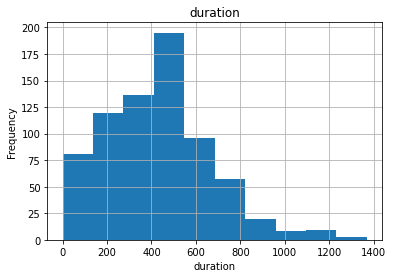

ultimate minutes mean: 428.0718232044199 ultimate minutes variance : 58463.016940874826 ultimate minutes standard_deviation: 241.7912672965565
most of the data can be found in this range: (-297.3019786852496, 1153.4456250940893)



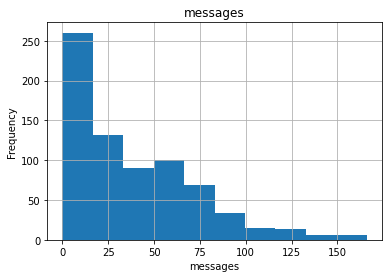

ultimate texts: 37.3439226519337 ultimate texts variance : 1208.15657908794 ultimate texts standard_deviation: 34.758546849486386
most of the data can be found in this range: (-66.93171789652547, 141.61956320039286)



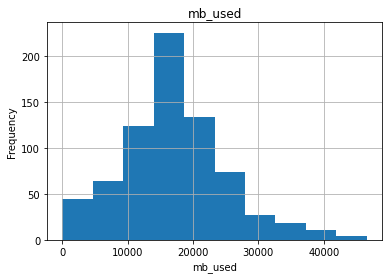

ultimate_data: 17119.590856353592 ultimate data variance : 62854742.21241668 ultimate data standard_deviation: 7928.098272121548
most of the data can be found in this range: (-6664.703960011051, 40903.885672718236)



In [22]:
ultimate_users = user_usages.query('plan == "ultimate"')

#Minutes: (Plot histograms)

ultimate_minutes_mean = ultimate_users['duration'].mean()
ultimate_minutes_variance = np.var(ultimate_users['duration'])
ultimate_minutes_standard_deviation = np.sqrt(ultimate_minutes_variance)
ultimate_users.hist('duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()
print('ultimate minutes mean:',ultimate_minutes_mean,
     'ultimate minutes variance :',  ultimate_minutes_variance,
     'ultimate minutes standard_deviation:', ultimate_minutes_standard_deviation)
print('most of the data can be found in this range:', (ultimate_minutes_mean - 3 *ultimate_minutes_standard_deviation,ultimate_minutes_mean + 3 * ultimate_minutes_standard_deviation))
print()

#Texts:

ultimate_texts_mean = ultimate_users['messages'].mean()
ultimate_texts_variance = np.var(ultimate_users['messages'])
ultimate_texts_standard_deviation = np.sqrt(ultimate_texts_variance)
ultimate_users.hist('messages')
plt.xlabel('messages')
plt.ylabel('Frequency')
plt.show()
print('ultimate texts:',ultimate_texts_mean,
     'ultimate texts variance :',  ultimate_texts_variance,
     'ultimate texts standard_deviation:', ultimate_texts_standard_deviation)
print('most of the data can be found in this range:', (ultimate_texts_mean - 3 *ultimate_texts_standard_deviation,ultimate_texts_mean + 3 * ultimate_texts_standard_deviation))
print()

#volume of data
ultimate_data_mean = ultimate_users['mb_used'].mean()
ultimate_data_variance = np.var(ultimate_users['mb_used'])
ultimate_data_standard_deviation = np.sqrt(ultimate_data_variance)
ultimate_users.hist('mb_used')
plt.xlabel('mb_used')
plt.ylabel('Frequency')
plt.show()
print('ultimate_data:',ultimate_data_mean,
     'ultimate data variance :',  ultimate_data_variance,
     'ultimate data standard_deviation:', ultimate_data_standard_deviation)
print('most of the data can be found in this range:', (ultimate_data_mean - 3 *ultimate_data_standard_deviation,ultimate_data_mean + 3 * ultimate_data_standard_deviation))
print()

**The negative numbers in the ranges mean 0 because of the equation does not refer specific to our case

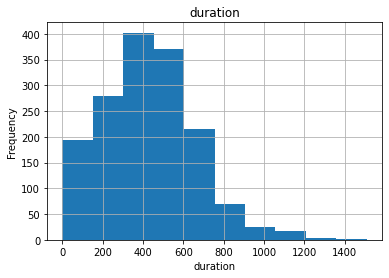

surf minutes mean: 427.12032932235593 surf minutes variance : 55420.45670514804 surf minutes standard_deviation: 235.4154980139329
most of the data can be found in this range: (-279.12616471944284, 1133.3668233641547)



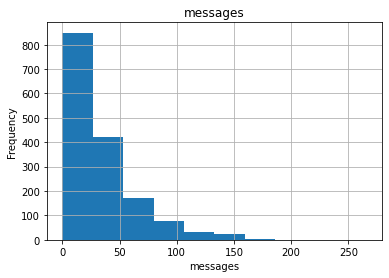

surf texts: 31.041165294490185 surf texts variance : 1125.404891865648 surf texts standard_deviation: 33.547054891087654
most of the data can be found in this range: (-69.59999937877278, 131.68232996775316)



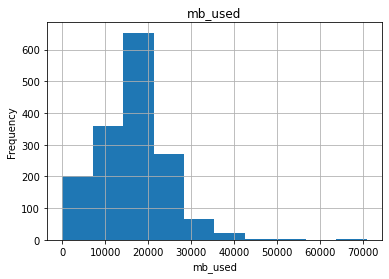

surf_data: 16495.364110196326 surf data variance : 64969590.72111388 surf data standard_deviation: 8060.3716242561595
most of the data can be found in this range: (-7685.750762572152, 40676.47898296481)



In [23]:
#Surf 

surf_users = user_usages.query('plan == "surf"')

#Minutes: (Plot histograms)

surf_minutes_mean = surf_users['duration'].mean()
surf_minutes_variance = np.var(surf_users['duration'])
surf_minutes_standard_deviation = np.sqrt(surf_minutes_variance)
surf_users.hist('duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()
print('surf minutes mean:',surf_minutes_mean,
     'surf minutes variance :',  surf_minutes_variance,
     'surf minutes standard_deviation:', surf_minutes_standard_deviation)
print('most of the data can be found in this range:', (surf_minutes_mean - 3 *surf_minutes_standard_deviation,surf_minutes_mean + 3 * surf_minutes_standard_deviation))
print()

#Texts:

surf_texts_mean = surf_users['messages'].mean()
surf_texts_variance = np.var(surf_users['messages'])
surf_texts_standard_deviation = np.sqrt(surf_texts_variance)
surf_users.hist('messages')
plt.xlabel('messages')
plt.ylabel('Frequency')
plt.show()
print('surf texts:',surf_texts_mean,
     'surf texts variance :',  surf_texts_variance,
     'surf texts standard_deviation:', surf_texts_standard_deviation)
print('most of the data can be found in this range:', (surf_texts_mean - 3 *surf_texts_standard_deviation,surf_texts_mean + 3 * surf_texts_standard_deviation))
print()

#volume of data
surf_data_mean = surf_users['mb_used'].mean()
surf_data_variance = np.var(surf_users['mb_used'])
surf_data_standard_deviation = np.sqrt(surf_data_variance)
surf_users.hist('mb_used')
plt.xlabel('mb_used')
plt.ylabel('Frequency')
plt.show()
print('surf_data:',surf_data_mean,
     'surf data variance :',  surf_data_variance,
     'surf data standard_deviation:', surf_data_standard_deviation)
print('most of the data can be found in this range:', (surf_data_mean - 3 *surf_data_standard_deviation,surf_data_mean + 3 * surf_data_standard_deviation))
print()

**Conclusion 3 

Using quiries we could find the data frames of all ultimate and all surf users.
The mean meaning was used for making calculations, the variance were found by np.var(x) function, then used sqrt to check standard deviation.

The mean of call duration is about 428 mins for ultimate users. Using the rule of three standard deviations. The duration histogram is scewed left which means that users taking less then the mean amount of calls duration for this plan

For surf users the mean duration is 427 mins . Data is scewed to right that mean that there many overpayed calls.

From comparing 2 plans we can see that means in minutes and texts are really close, and also upper ranges are really close to each other. The difference in internet usage is not so big neither but the mean usage of surf plan is actually higher than what's provided, there are many people using surf plan that might be better to use ultimate plan.

**Step 4 Test the hypotheses

**The average profit from users of Ultimate and Surf calling plans is the same

H0: There is no difference between average profits from Ultimate and Surf plan.


H1: There is a difference between average profits from Ultimate and Surf plan.

In [24]:
st.levene(surf_users['total_cost'], ultimate_users['total_cost'], center='mean')

LeveneResult(statistic=605.5528082118988, pvalue=6.749383286354037e-119)

In [25]:
alpha = 0.05 # critical statistical significance level, if p-value is less than alpha, we reject hypotheses
#because of different dataframes we use equal_var = False

result1 =  st.ttest_ind(
        surf_users['total_cost'],
        ultimate_users['total_cost'],equal_var = False)

print('p-value:', result1.pvalue)

if (result1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis" )

    
#general mean
surf_mean = surf_users['total_cost'].mean()
ultimate_mean = ultimate_users['total_cost'].mean()
print('surf mean:', surf_mean)
print('ultimate mean:', ultimate_mean )

p-value: 6.752084019741693e-10
We reject the null hypothesis
surf mean: 63.198974034198855
ultimate mean: 72.63950276243094


**The average profit from users in NY-NJ area is different from that of users from other regions

HO: The average profit from NY-NJ region is equal to profit from users from others regions.



H1: The average profit from NY-NJ region is different comparing with users from other regions.

In [26]:
ny_nj_users = user_usages[user_usages['city'].str.contains("NY-NJ")]
ny_nj_users

other_regions = user_usages[~user_usages['city'].str.contains("NY-NJ")]
other_regions #the rest of reqions except NY-NJ

,user_id,duration,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,plan_name_id,total_cost
0,1000,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2022-02-20,1,70.00
1,1001,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,20.00
2,1001,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,20.00
3,1001,393.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,100.09
4,1001,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2022-02-20,0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.00,0.0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,2022-02-20,0,20.00
2299,1319,0.0,0.0,0.00,0.0,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,2022-02-20,0,20.00
2300,1378,0.0,0.0,0.00,0.0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,2022-02-20,0,20.00
2301,1463,0.0,0.0,0.00,0.0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,2022-02-20,1,70.00


In [27]:
st.levene(ny_nj_users['total_cost'], other_regions['total_cost'], center='mean')

LeveneResult(statistic=2.6168488192675, pvalue=0.10587129109861691)

In [28]:
alpha = 0.05 # critical statistical significance level, if p-value is less than alpha, we reject hypotheses
#because of the same dataframe we can use equal_var = true

result2 =  st.ttest_ind(
        ny_nj_users['total_cost'],
        other_regions['total_cost'],equal_var = True)

print('p-value:', result2.pvalue)

if (result2.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis" )

    
#general mean
ny_nj_users_mean = surf_users['total_cost'].mean()
other_regions_mean = ultimate_users['total_cost'].mean()
print('ny nj users mean:', ny_nj_users_mean)
print('other regions mean:', other_regions_mean )

p-value: 0.09430862843005997
We can't reject the null hypothesis
ny nj users mean: 63.198974034198855
other regions mean: 72.63950276243094


## General conclusion

The first look at given dataframes let us to make a few conclusions.

There is no missing values in given dataframes, except chunk_date column. The cause of it is that user had been used his tariff till the moment of data collection. It will be proceed in further steps.

ID column is the main column that connect customer's calls, messages, internet and plan that fits him.

There are few columns that should be transformed in case to make appropriate calculations (to change date to datetime format and change objects to integers)

Calls duration were rounded using math (imported library) and type was changed to integer.

Pivot_table (based on user_id, session_month, mb_used and values with sum()function) was used for internet dataframe to calculate traffic per month and round it up to gygabites.

For plans plan_id column were added by applying a function to identify current plan.

In churn_date missing values were filled by 01.01.19 (the date of the next year can be used to confirm using the current tariff plan).

Using quiries we could find the data frames of all ultimate and all surf users.
The mean meaning was used for making calculations, the variance were found by np.var(x) function, then used sqrt to check standard deviation.

The mean of call duration is about 428 mins for ultimate users. Using the rule of three standard deviations. The duration histogram is scewed left which means that users taking less then the mean amount of calls duration for this plan

For surf users the mean duration is 427 mins . Data is scewed to right that mean that there many overpayed calls.

From comparing 2 plans we can see that means in minutes and texts are really close, and also upper ranges are really close to each other. The difference in internet usage is not so big neither but the mean usage of surf plan is actually higher than what's provided, there are many people using surf plan that might be better to use ultimate plan.

Our statistical tests for hypotheses we rejected due to provided tests. The mean profit from NY-NJ region is less than from other regions.
